In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#from helpers import categorical_univariate , categorical_bivariate
from scipy.stats import chi2_contingency
from pandas.plotting import scatter_matrix
import scipy.stats as stats
from sklearn.decomposition import PCA


In [4]:
df = pd.read_csv('creditcard_2023.csv')
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [3]:
df.dtypes

id          int64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [4]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
# Check for duplicated rows across all columns
duplicated_rows = df[df.duplicated()]

if len(duplicated_rows) > 0:
    print("Duplicated rows found:")
    print(duplicated_rows)
else:
    print("No duplicated rows found.")

No duplicated rows found.


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Mohamed Bol

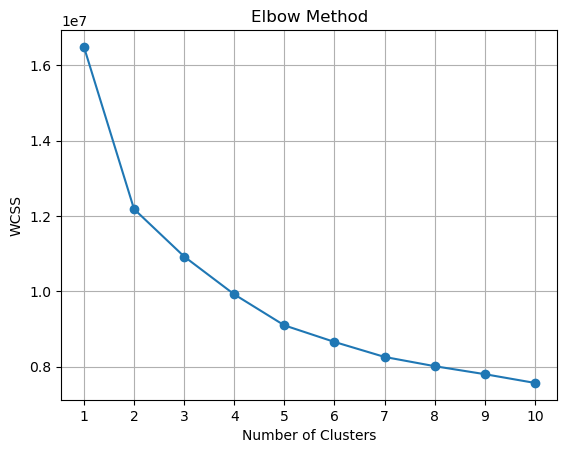

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Select features for clustering
features = df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Initialize list to store WCSS values
wcss = []

# Calculate WCSS for different values of k
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


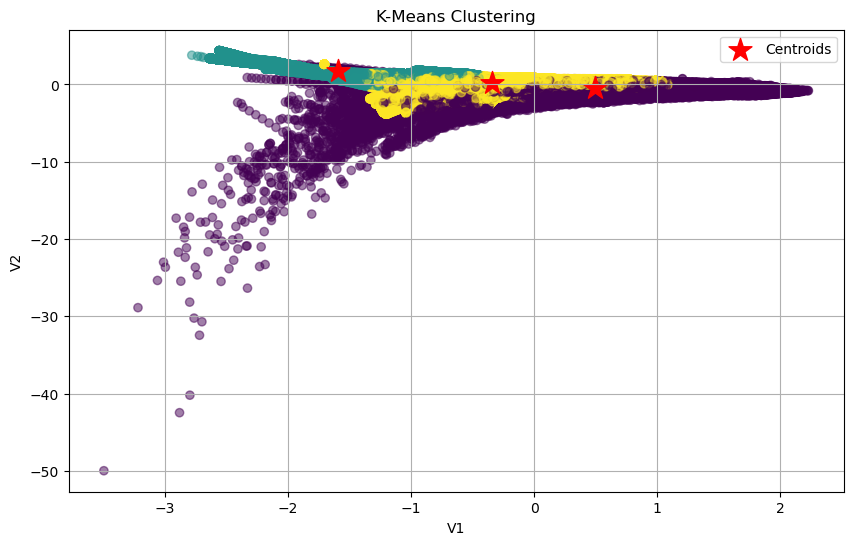

In [7]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
# Select features for clustering
features = df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform k-means clustering
k = 3  # You can choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_features)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(df['V1'], df['V2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('K-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()

C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


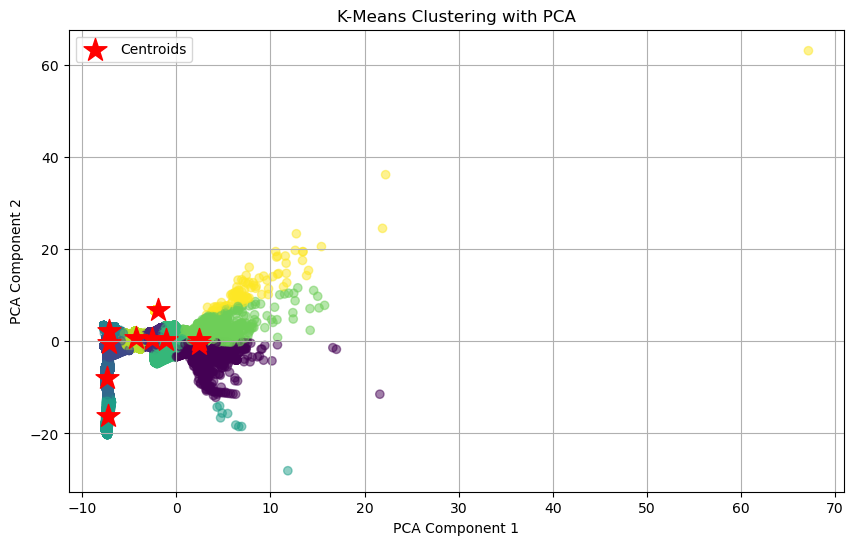

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


# Select features for clustering
features = df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)  # We want to reduce the dimensionality to 2 for visualization
pca_features = pca.fit_transform(scaled_features)

# Perform k-means clustering on the PCA-transformed data
k = 10  # You can choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(pca_features)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(pca_features[:, 0], pca_features[:, 1], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('K-Means Clustering with PCA')
plt.legend()
plt.grid(True)
plt.show()


C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\sklearn\cluster\_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


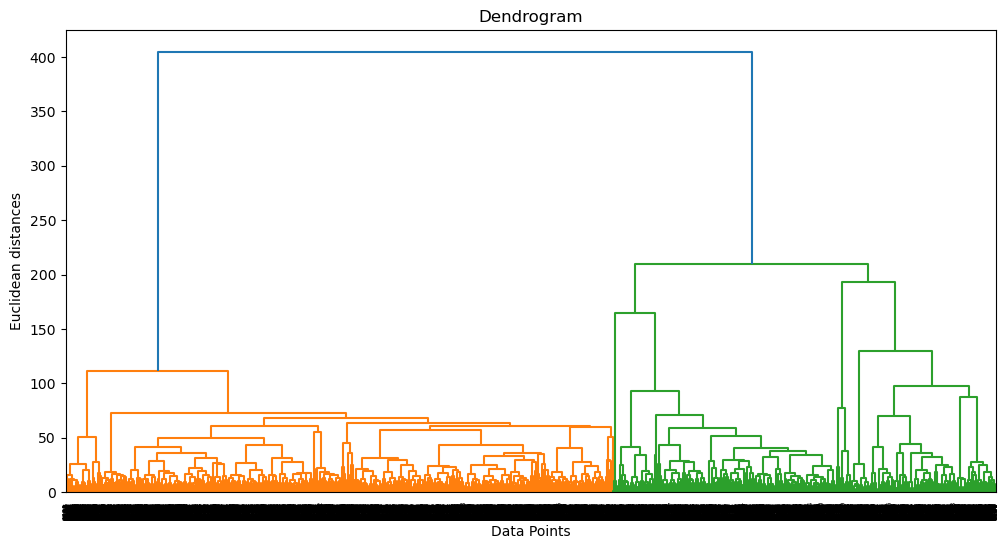

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
import numpy as np



# Sample a subset of the data
sample_size = 10000  # Choose the size of the sample
sampled_df = df.sample(n=sample_size, random_state=42)

# Select features for clustering
features = sampled_df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform hierarchical clustering
k = 3  # You can choose the number of clusters
hc = AgglomerativeClustering(n_clusters=k, affinity='euclidean', linkage='ward')
hc.fit(scaled_features)

# Visualize the dendrogram
plt.figure(figsize=(12, 6))
dendrogram = sch.dendrogram(sch.linkage(scaled_features, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Data Points')
plt.ylabel('Euclidean distances')
plt.show()


In [8]:
pip install -U scikit-fuzzy


  Using cached scikit-fuzzy-0.4.2.tar.gz (993 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 160, in exc_logging_wrapper
    status = run_func(*args)
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 247, in wrapper
    return func(self, options, args)
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 400, in run
    requirement_set = resolver.resolve(
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_internal\resolution\resolvelib\resolver.py", line 92, in resolve
    result = self._result = resolver.resolve(
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 481, in resolve
    state = resolution.resolve(requirements, max_rounds=max_rounds)
  File "C:\Users\Mohamed Bolbol\anaconda3\lib\site-packages\pip\_vendor\resolvelib\resolvers.py", line 348, in resolve
 

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import skfuzzy as fuzz
from sklearn.preprocessing import StandardScaler



# Select features for clustering
features = df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Specify the number of clusters
k = 3  # You can choose the number of clusters

# Perform fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(scaled_features.T, k, 2, error=0.005, maxiter=1000, init=None)

# Get the cluster membership probabilities
cluster_membership = np.argmax(u, axis=0)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_membership

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(df['V1'], df['V2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Fuzzy C-Means Clustering')
plt.grid(True)
plt.show()


ModuleNotFoundError: No module named 'skfuzzy'

In [14]:
pip show scikit-fuzzy

Note: you may need to restart the kernel to use updated packages.


In [13]:
pip install fuzzy-c-means

     ---------------------------------------- 2.2/2.2 MB 1.6 MB/s eta 0:00:00
     -------------------------------------- 82.8/82.8 kB 145.1 kB/s eta 0:00:00
  Attempting uninstall: pydantic
    Found existing installation: pydantic 2.5.2
    Uninstalling pydantic-2.5.2:
      Successfully uninstalled pydantic-2.5.2
  Attempting uninstall: click
    Found existing installation: click 8.0.4
    Uninstalling click-8.0.4:
      Successfully uninstalled click-8.0.4
  Attempting uninstall: typer
    Found existing installation: typer 0.9.0
    Uninstalling typer-0.9.0:
      Successfully uninstalled typer-0.9.0
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 2.2.2 requires click>=8.0, but you have click 7.1.2 which is incompatible.
black 22.6.0 requires click>=8.0.0, but you have click 7.1.2 which is incompatible.


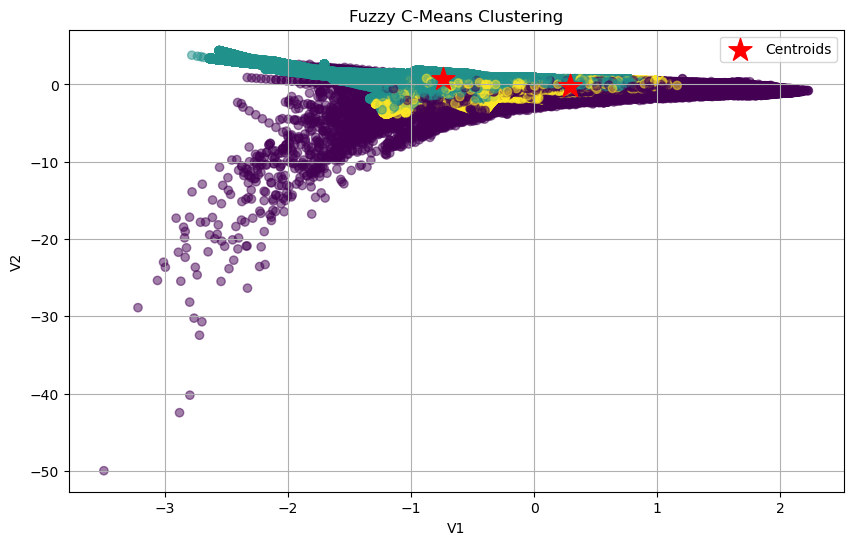

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler


# Select features for clustering
features = df.drop(columns=['id', 'Class'])

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Specify the number of clusters
k = 3  # You can choose the number of clusters

# Perform fuzzy c-means clustering
fcm = FCM(n_clusters=k)
fcm.fit(scaled_features)

# Get the cluster centers and membership probabilities
centers = fcm.centers
u = fcm.u

# Get the cluster membership probabilities
cluster_membership = np.argmax(u, axis=1)

# Add cluster labels to the DataFrame
df['Cluster'] = cluster_membership

# Visualize the clustering result
plt.figure(figsize=(10, 6))
plt.scatter(df['V1'], df['V2'], c=df['Cluster'], cmap='viridis', alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.xlabel('V1')
plt.ylabel('V2')
plt.title('Fuzzy C-Means Clustering')
plt.legend()
plt.grid(True)
plt.show()
